# Covariance Estimators

These estimators robustly estimate the covariance of features given a set of points.

## Empirical Covariance

Maximum likelihood covariance estimator

In [2]:
import numpy as np
from sklearn.covariance import EmpiricalCovariance
real_cov = np.array([[.8, .3], [.3, .4]])
rng = np.random.RandomState(0)
X = rng.multivariate_normal(mean=[0, 0],cov=real_cov, size=500)
cov = EmpiricalCovariance().fit(X)
cov.covariance_

array([[0.75693565, 0.28186631],
       [0.28186631, 0.39288421]])

In [3]:
cov.location_

array([0.06228968, 0.01937939])

## Elliptic Envelope

An object for detecting outliers in a Gaussian distributed dataset.

In [4]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
true_cov = np.array([[.8, .3], [.3, .4]])
X = np.random.RandomState(0).multivariate_normal(mean=[0, 0],cov=true_cov,size=500)
cov = EllipticEnvelope(random_state=0).fit(X)
# predict returns 1 for an inlier and -1 for an outlier
cov.predict([[0, 0], [3, 3]])

array([ 1, -1])

In [5]:
cov.covariance_

array([[0.74118335, 0.25357049],
       [0.25357049, 0.30531502]])

In [6]:
cov.location_

array([0.0813539 , 0.04279722])

### Outlier Detection

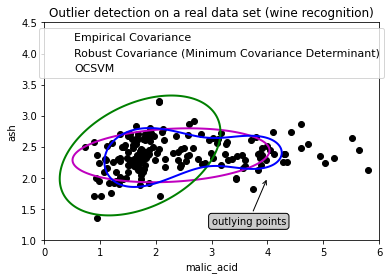

In [7]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_wine

# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
        contamination=0.25
    ),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}
colors = ["m", "g", "b"]
legend1 = {}
legend2 = {}

# Get data
X1 = load_wine()["data"][:, [1, 2]]  # two clusters

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 6, 500), np.linspace(1, 4.5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i]
    )

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X1[:, 0], X1[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate(
    "outlying points",
    xy=(4, 2),
    xycoords="data",
    textcoords="data",
    xytext=(3, 1.25),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend(
    (
        legend1_values_list[0].collections[0],
        legend1_values_list[1].collections[0],
        legend1_values_list[2].collections[0],
    ),
    (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
    loc="upper center",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.ylabel("ash")
plt.xlabel("malic_acid")

plt.show()

## Graphical Lasso

Sparse inverse covariance estimation with an l1-penalized estimator.

In [8]:
import numpy as np
from sklearn.covariance import GraphicalLasso
true_cov = np.array([[0.8, 0.0, 0.2, 0.0], [0.0, 0.4, 0.0, 0.0], [0.2, 0.0, 0.3, 0.1], [0.0, 0.0, 0.1, 0.7]])
np.random.seed(0)
X = np.random.multivariate_normal(mean=[0, 0, 0, 0], cov=true_cov, size=200)
cov = GraphicalLasso().fit(X)
np.around(cov.covariance_, decimals=3)

array([[0.816, 0.049, 0.218, 0.019],
       [0.049, 0.364, 0.017, 0.034],
       [0.218, 0.017, 0.322, 0.093],
       [0.019, 0.034, 0.093, 0.69 ]])

In [9]:
np.around(cov.location_, decimals=3)

array([0.073, 0.04 , 0.038, 0.143])

## Graphical Lasso CV

Sparse inverse covariance w/ cross-validated choice of the l1 penalty.

In [10]:
import numpy as np
from sklearn.covariance import GraphicalLassoCV
true_cov = np.array([[0.8, 0.0, 0.2, 0.0],
                    [0.0, 0.4, 0.0, 0.0],
                    [0.2, 0.0, 0.3, 0.1],
                    [0.0, 0.0, 0.1, 0.7]])
np.random.seed(0)
X = np.random.multivariate_normal(mean=[0, 0, 0, 0], cov=true_cov, size=200)
cov = GraphicalLassoCV().fit(X)
np.around(cov.covariance_, decimals=3)

array([[0.816, 0.051, 0.22 , 0.017],
       [0.051, 0.364, 0.018, 0.036],
       [0.22 , 0.018, 0.322, 0.094],
       [0.017, 0.036, 0.094, 0.69 ]])

In [11]:
np.around(cov.location_, decimals=3)

array([0.073, 0.04 , 0.038, 0.143])

## Ledoit Wolf

Ledoit-Wolf is a particular form of shrinkage, where the shrinkage coefficient is computed using O. Ledoit and M. Wolf’s formula as described in “A Well-Conditioned Estimator for Large-Dimensional Covariance Matrices”, Ledoit and Wolf, Journal of Multivariate Analysis, Volume 88, Issue 2, February 2004, pages 365-411.

In [12]:
import numpy as np
from sklearn.covariance import LedoitWolf
real_cov = np.array([[.4, .2],
                    [.2, .8]])
np.random.seed(0)
X = np.random.multivariate_normal(mean=[0, 0],cov=real_cov, size=50)
cov = LedoitWolf().fit(X)
cov.covariance_

array([[0.44067332, 0.16161585],
       [0.16161585, 0.80226294]])

In [13]:
cov.location_

array([ 0.0595348 , -0.00756804])

## MinCovDet

Minimum Covariance Determinant (MCD): robust estimator of covariance.

The Minimum Covariance Determinant covariance estimator is to be applied on Gaussian-distributed data, but could still be relevant on data drawn from a unimodal, symmetric distribution. It is not meant to be used with multi-modal data (the algorithm used to fit a MinCovDet object is likely to fail in such a case). One should consider projection pursuit methods to deal with multi-modal datasets.

In [14]:
import numpy as np
from sklearn.covariance import MinCovDet
from sklearn.datasets import make_gaussian_quantiles
real_cov = np.array([[.8, .3],
                    [.3, .4]])
rng = np.random.RandomState(0)
X = rng.multivariate_normal(mean=[0, 0],
cov=real_cov,
size=500)
cov = MinCovDet(random_state=0).fit(X)
cov.covariance_

array([[0.74118335, 0.25357049],
       [0.25357049, 0.30531502]])

In [15]:
cov.location_

array([0.0813539 , 0.04279722])

## Shrunk Covariance

Covariance Estimator with shrinkage

In [16]:
import numpy as np
from sklearn.covariance import ShrunkCovariance
from sklearn.datasets import make_gaussian_quantiles
real_cov = np.array([[.8, .3], [.3, .4]])
rng = np.random.RandomState(0)
X = rng.multivariate_normal(mean=[0, 0],
                                  cov=real_cov,
                                  size=500)
cov = ShrunkCovariance().fit(X)
cov.covariance_

array([[0.73873308, 0.25367968],
       [0.25367968, 0.41108678]])

In [17]:
cov.location_

array([0.06228968, 0.01937939])